# Nonlinear Fast-Reaction system3

In [1]:
using TUMProject
using DifferentialEquations

### Define grid

In [2]:
r = 25
n = (2*r + 1)
N = n^2
grid = uniform2dgrid(-r:r,-r:r)
operator = laplace2dpbc(grid)  

Laplace Operator with periodic boundary condtions


### Set up initial condtions

In [3]:
u0 = zeros(Float64, (n,n))
v0 = zeros(Float64, (n,n))
u0[r:2*r-1,r:2*r-1] .= 1f0
u0[3:r,3:r] .= 1f0
v0[2:2*r-1,r+1:2*r-1] .= 1f0;
#plotinitialconditions(u0, v0, "u0", "v0")

### Define systems

In [6]:
D_u = 200.5
D_v = 100.4
g(u,v) = -v^2*u + u*v - v^3
f(u,v) = -u - sin(v^2)*u - cos(10*v) - v^3
h(v) = -(cos(10*v)+v^3)/(1+sin(v^2))
eps = 0.5
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
limitsystem = fastreactionlimitsystem(operator, h, g, D_v)

Limit System of Fast-Reaction-System


In [7]:
tol = 0.2e-3
T_max = 2.0
tspan = (0.0, T_max)
limitprob = ODEProblem(limitsystem, reshape(v0, :) , tspan, N)
limitsol = solve(limitprob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 480-element Vector{Float64}:
 0.0
 2.8171556736258713e-8
 3.098871240988458e-7
 3.1270427977247167e-6
 3.044193582710484e-5
 9.038931766483152e-5
 0.00017058200833752562
 0.00027638289921733957
 0.0004081368705501048
 0.0005711726644454606
 0.0007706600608557834
 0.0010137178919298348
 0.0013116056418318082
 ⋮
 1.9523854672163046
 1.9567425318087153
 1.9610995907454163
 1.965456643737859
 1.969813690786052
 1.9741707324671132
 1.9785277690696041
 1.9828847997278674
 1.987241824730465
 1.9915988449430657
 1.9959558603656744
 2.0
u: 480-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [1.0666525648491948e-23, 3.771195413332287e-18, 3.771206079842816e-18, 3.771206079857891e-18, 3.771206079857891e-18, 3.771206079857891e-18, 3.771206079857891e-18, 3.771206079857891e-18, 3.771206079857891e-18, 3.771206079857891e-18  …  3.99997

In [8]:
ulimit(t) = reshape( h.(limitsol(t)), n, n )
vlimit(t) = reshape( limitsol(t), n, n )
ts = tspan[1]:0.01:tspan[2]
#animatesystem( ulimit, vlimit ,"ulimit", "vlimit", ts, [0.0, 1.0], "limitsystem3", 15.0)

0.0:0.01:2.0

In [9]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 935-element Vector{Float64}:
 0.0
 1.5955826764528264e-8
 1.755140944098109e-7
 1.7710967708626372e-6
 1.77269235353909e-5
 5.533164836031088e-5
 0.00011623791694741268
 0.00019667409598175925
 0.0003040382140835546
 0.0004380144246353808
 0.00060425910859374
 0.000796537715637518
 0.0010387370270154021
 ⋮
 1.9776337069400074
 1.9798184482039085
 1.9820031879341
 1.984187925841204
 1.98637266235929
 1.988557397488359
 1.9907421312284115
 1.9929268634347597
 1.9951115941074045
 1.997296323246347
 1.999481050996277
 2.0
u: 935-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [-3.191165301987968e-8, -3.191165300350904e-8, -3.190653580487922e-8, -3.190653578850856e-8, -3.190653578850853e-8, -3.190653578850853e-8, -3.190653578850853e-8, -3.190653578850853e-8, -3.190653578850853e-8, -3.190653578850853e-8  …  1.2831425093367993

In [10]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "system3a", 15.0)

v (generic function with 1 method)

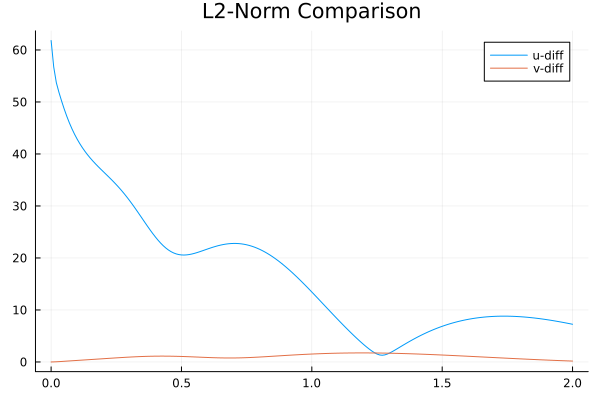

In [11]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

In [12]:
eps = 0.1
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)

Fast-Reaction-System


In [13]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 940-element Vector{Float64}:
 0.0
 1.6312782777956863e-8
 1.7944061055752546e-7
 1.8107188883532115e-6
 1.8123501666310072e-5
 6.614134385560835e-5
 0.00013854520193584452
 0.00023466383947919707
 0.00035889005524943356
 0.0005114454091350589
 0.0007024097194361759
 0.0009305523272906903
 0.0012137705370553818
 ⋮
 1.9762315109030637
 1.9784036444904247
 1.980575779430021
 1.9827479160095633
 1.984920054085198
 1.987092193800781
 1.9892643351563137
 1.991436478007942
 1.9936086223556668
 1.9957807681994892
 1.9979529155394102
 2.0
u: 940-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [-1.6312781447422526e-7, -1.631278144567309e-7, -1.631224657401582e-7, -1.6312246572266412e-7, -1.6312246572266415e-7, -1.6312246572266415e-7, -1.6312246572266415e-7, -1.6312246572266415e-7, -1.6312246572266415e-7, -1.6312246572266415e-7  …

In [14]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "system3b", 15.0)

v (generic function with 1 method)

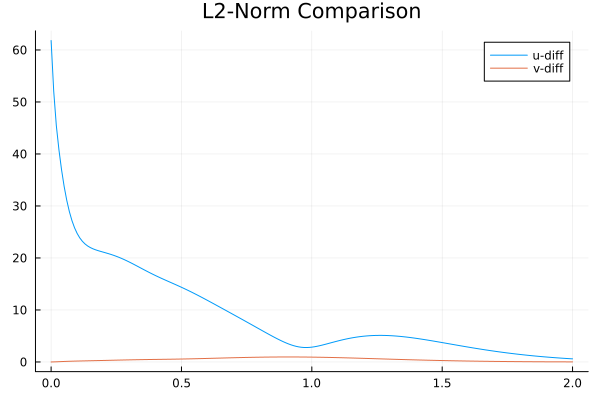

In [15]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

In [16]:
eps = 0.001
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)

Fast-Reaction-System


In [17]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1662-element Vector{Float64}:
 0.0
 1.6375634946231086e-9
 1.8013198440854193e-8
 1.8176954790316504e-7
 1.8193330425262733e-6
 1.596995380615417e-5
 5.201304936873593e-5
 0.00010621868737498287
 0.00017068928176307274
 0.00025102155361917566
 0.00035105277493071354
 0.0004811169084776882
 0.0006391132685996022
 ⋮
 1.9868515192932859
 1.9881138591801641
 1.98937619550563
 1.9906385284368948
 1.9919008578903674
 1.9931631839496575
 1.9944255066147745
 1.9956878258021273
 1.996950141511726
 1.9982124537435795
 1.999474762581297
 2.0
u: 1662-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [-1.637562153816741e-6, -1.6375621538167234e-6, -1.6375620999160954e-6, -1.637562099916078e-6, -1.637562099916078e-6, -1.637562099916078e-6, -1.637562099916078e-6, -1.637562099916078e-6, -1.637562099916078e-6, -1.637562099916078e-6  …  1.

In [18]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "system3c", 15.0)

v (generic function with 1 method)

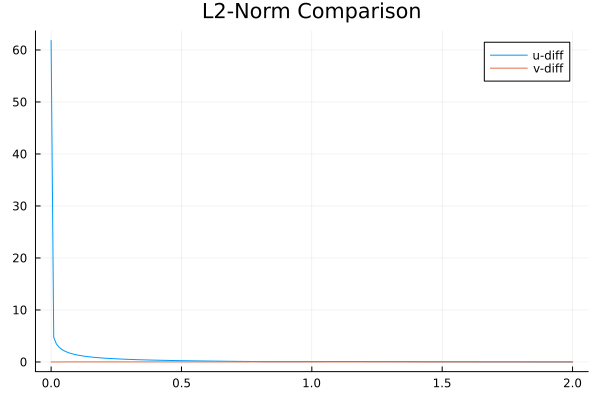

In [19]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")